# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
%matplotlib notebook

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
now = datetime.datetime.now()

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Creating base URL and empty dataframe
url = f'https://api.openweathermap.org/data/2.5/weather?APPID={"759922283dbc9b85ac7cba5df0dda446"}&units=imperial&q='
data_df = pd.DataFrame({'City':[],
                        'Cloudiness':[],
                        'Country':[],
                        'Date':[],
                        'Humidity':[],
                        'Lat':[],
                        'Lng':[],
                        'Max_temp':[],
                        'Wind_speed':[]
                       })

print(data_df)

#API request for each city and populating dataframe in the same loop
i = 0
for city in cities:    
    response_req = requests.get(url+city)
    response = response_req.json()

    if (response['cod'] == 200):
        i = i+1
        print(f'Processing Record {i} | {city}')
        print(response_req.url)

        data_df.loc[i,'City'] = city
        data_df.loc[i,'Cloudiness'] = response['clouds']['all']
        data_df.loc[i,'Country'] = response['sys']['country']
        data_df.loc[i,'Date'] = now.strftime("%Y-%m-%d") 
        data_df.loc[i,'Humidity'] = response['main']['humidity']
        data_df.loc[i,'Lat'] = response['coord']['lat']
        data_df.loc[i,'Lng'] = response['coord']['lon']
        data_df.loc[i,'Max_temp'] = response['main']['temp_max']
        data_df.loc[i,'Wind_speed'] = response['wind']['speed']
    else:
        print('City not found. Skipping')
            
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Empty DataFrame
Columns: [City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max_temp, Wind_speed]
Index: []
Processing Record 1 | port elizabeth
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=port%20elizabeth
Processing Record 2 | vaini
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=vaini
Processing Record 3 | hilo
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=hilo
Processing Record 4 | ushuaia
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=ushuaia
Processing Record 5 | yenagoa
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=yenagoa
Processing Record 6 | nikolskoye
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=nikolskoye
Processing Record 7 | abn

Processing Record 56 | jamestown
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=jamestown
Processing Record 57 | pacific grove
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=pacific%20grove
Processing Record 58 | salinopolis
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=salinopolis
Processing Record 59 | qingyuan
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=qingyuan
Processing Record 60 | kapaa
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=kapaa
City not found. Skipping
Processing Record 61 | tessalit
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=tessalit
Processing Record 62 | hargeysa
https://api.openweathermap.org/data/2.5/weather?APPID=75992

Processing Record 111 | hami
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=hami
Processing Record 112 | dunhua
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=dunhua
Processing Record 113 | kungurtug
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=kungurtug
Processing Record 114 | mataura
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=mataura
Processing Record 115 | yellowknife
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=yellowknife
Processing Record 116 | ponta do sol
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=ponta%20do%20sol
Processing Record 117 | nisia floresta
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df

Processing Record 166 | pitimbu
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=pitimbu
Processing Record 167 | vestmannaeyjar
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=vestmannaeyjar
Processing Record 168 | gladstone
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=gladstone
Processing Record 169 | coquimbo
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=coquimbo
Processing Record 170 | nishihara
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=nishihara
Processing Record 171 | campo maior
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=campo%20maior
Processing Record 172 | clyde river
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc

Processing Record 220 | marfino
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=marfino
Processing Record 221 | suwannaphum
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=suwannaphum
Processing Record 222 | jacksonville
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=jacksonville
Processing Record 223 | guna
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=guna
City not found. Skipping
Processing Record 224 | windhoek
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=windhoek
Processing Record 225 | iqaluit
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=iqaluit
Processing Record 226 | kyzyl-suu
https://api.openweathermap.org/data/2.5/weather?APPID=759922283

Processing Record 276 | kutum
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=kutum
Processing Record 277 | innisfail
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=innisfail
Processing Record 278 | columbus
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=columbus
City not found. Skipping
Processing Record 279 | narsaq
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=narsaq
Processing Record 280 | slave lake
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=slave%20lake
City not found. Skipping
Processing Record 281 | port blair
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=port%20blair
Processing Record 282 | pasni
https://api.openweathermap.org/data/2.5/

Processing Record 331 | engis
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=engis
Processing Record 332 | buchanan
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=buchanan
Processing Record 333 | superior
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=superior
Processing Record 334 | mitsamiouli
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=mitsamiouli
Processing Record 335 | liling
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=liling
Processing Record 336 | vao
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=vao
Processing Record 337 | jishou
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=jis

Processing Record 386 | fortuna
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=fortuna
Processing Record 387 | lata
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=lata
Processing Record 388 | ojinaga
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=ojinaga
Processing Record 389 | bryan
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=bryan
Processing Record 390 | kadayanallur
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=kadayanallur
Processing Record 391 | cidreira
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=cidreira
City not found. Skipping
Processing Record 392 | hit
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0d

Processing Record 442 | nagato
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=nagato
Processing Record 443 | saint-louis
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=saint-louis
Processing Record 444 | akdepe
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=akdepe
Processing Record 445 | wuzhou
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=wuzhou
Processing Record 446 | lagoa
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=lagoa
Processing Record 447 | vagur
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=vagur
Processing Record 448 | tabou
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=tabou
Pr

Processing Record 498 | margate
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=margate
Processing Record 499 | grand-santi
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=grand-santi
Processing Record 500 | sapernyy
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=sapernyy
Processing Record 501 | ayan
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=ayan
Processing Record 502 | linxia
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=linxia
Processing Record 503 | manavgat
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=manavgat
Processing Record 504 | ahuimanu
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperi

Processing Record 554 | kudahuvadhoo
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=kudahuvadhoo
City not found. Skipping
Processing Record 555 | vanimo
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=vanimo
Processing Record 556 | sawakin
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=sawakin
Processing Record 557 | angoram
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=angoram
Processing Record 558 | sharjah
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=sharjah
Processing Record 559 | ayolas
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85ac7cba5df0dda446&units=imperial&q=ayolas
Processing Record 560 | ketchikan
https://api.openweathermap.org/data/2.5/weather?APPID=759922283dbc9b85a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
data_df.to_csv('weather_data.csv')

In [6]:
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
1,port elizabeth,90.0,US,2018-11-05,92.0,39.31,-74.98,41.00,6.93
2,vaini,0.0,IN,2018-11-05,34.0,15.34,74.49,78.80,4.70
3,hilo,75.0,US,2018-11-05,70.0,19.71,-155.08,66.92,6.93
4,ushuaia,90.0,AR,2018-11-05,81.0,-54.81,-68.31,42.80,40.26
5,yenagoa,24.0,NG,2018-11-05,80.0,4.92,6.26,86.40,4.38


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

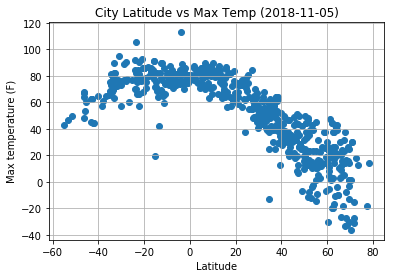

In [7]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Max_temp'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title(f"City Latitude vs Max Temp ({data_df.iloc[0]['Date']})")
plt.savefig('images/LatvsTemp.png')

#### Latitude vs. Humidity Plot

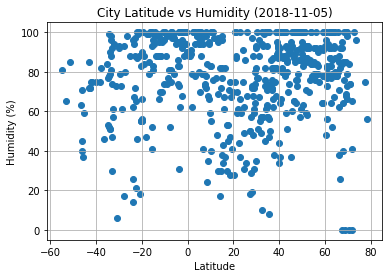

In [8]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Humidity'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity ({data_df.iloc[0]['Date']})")
plt.savefig('images/LatvsHumidity.png')

#### Latitude vs. Cloudiness Plot

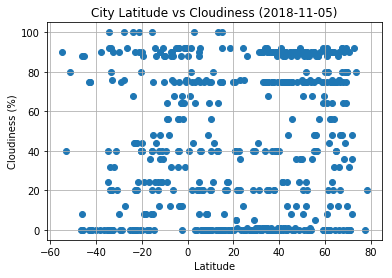

In [9]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Cloudiness'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness ({data_df.iloc[0]['Date']})")
plt.savefig('images/LatvsCloudiness.png')

#### Latitude vs. Wind Speed Plot

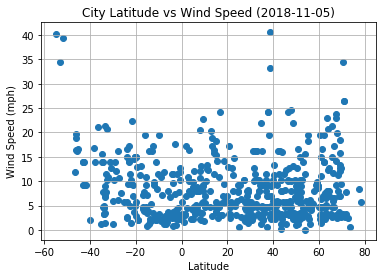

In [10]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Wind_speed'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs Wind Speed ({data_df.iloc[0]['Date']})")
plt.savefig('images/LatvsWindSpeed.png')